In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
print('Train Images: {}'.format(x_train.shape))
print('Test Images: {}'.format(x_test.shape))

Train Images: (50000, 32, 32, 3)
Test Images: (10000, 32, 32, 3)


In [5]:
print(x_train[0].shape)

(32, 32, 3)


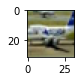

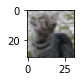

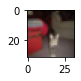

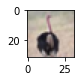

In [6]:
for i in range (332,336):
    plt.subplot(120+1+i)
    img=x_train[i]
    plt.imshow(img)
    plt.show()

In [7]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
n_classes=10
print(x_train.shape)
print("Shape before one-hot encoding ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding ",y_train.shape)

(50000, 32, 32, 3)
Shape before one-hot encoding  (50000, 1)
Shape after one-hot encoding  (50000, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [9]:
model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
#output
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

print(x_train.shape)
print(y_train.shape)
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test, y_test))

(50000, 32, 32, 3)
(50000, 10)
Epoch 1/20
391/391 [==============================] - 145s 369ms/step - loss: 1.6302 - accuracy: 0.3984 - val_loss: 1.2793 - val_accuracy: 0.5430
Epoch 2/20
391/391 [==============================] - 143s 366ms/step - loss: 1.1909 - accuracy: 0.5763 - val_loss: 1.0261 - val_accuracy: 0.6456
Epoch 3/20
391/391 [==============================] - 144s 369ms/step - loss: 0.9874 - accuracy: 0.6540 - val_loss: 0.8499 - val_accuracy: 0.7019
Epoch 4/20
391/391 [==============================] - 140s 359ms/step - loss: 0.8692 - accuracy: 0.6957 - val_loss: 0.7854 - val_accuracy: 0.7287
Epoch 5/20
391/391 [==============================] - 148s 379ms/step - loss: 0.7866 - accuracy: 0.7245 - val_loss: 0.7321 - val_accuracy: 0.7499
Epoch 6/20
391/391 [==============================] - 142s 362ms/step - loss: 0.7151 - accuracy: 0.7511 - val_loss: 0.7028 - val_accuracy: 0.7587
Epoch 7/20
391/391 [==============================] - 140s 359ms/step - loss: 0.6601 - accura

In [14]:
classes=range(0,10)
names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']

class_labels=dict(zip(classes,names))

batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 17ms/step


In [15]:
print(predictions)

for image in predictions:
    print(np.sum(image))
    
class_result=np.argmax(predictions,axis=1)
print(class_result)

[[1.9581406e-05 1.7161159e-06 2.9609893e-03 6.1945869e-03 3.6616519e-01
  2.4534104e-02 4.0500552e-05 6.0005283e-01 1.2486265e-05 1.8122004e-05]
 [5.4489032e-05 2.5114925e-05 4.5834284e-02 4.7703221e-02 1.3590409e-02
  8.0851316e-01 7.0138634e-03 7.6696530e-02 1.2430828e-04 4.4457175e-04]
 [1.7067144e-08 1.2931615e-06 4.5474034e-04 2.8225845e-03 1.4964044e-06
  1.5981129e-03 9.9511540e-01 3.3170572e-06 2.7539577e-06 3.4734012e-07]
 [3.6615197e-07 1.3406739e-08 2.4830222e-05 9.8593569e-01 2.9554285e-04
  7.9510338e-04 1.2946409e-02 1.4355884e-06 1.6206964e-07 5.3753615e-07]
 [1.2163673e-09 9.9999249e-01 7.8969590e-17 6.6326129e-14 1.0510173e-16
  2.0024534e-17 4.0981898e-15 1.8423722e-14 6.9572712e-07 6.7904280e-06]
 [3.6762104e-10 9.9999809e-01 2.1827080e-13 4.3002928e-11 3.3396860e-16
  3.2363240e-12 7.5619101e-13 6.9425010e-15 1.4232381e-06 5.0517275e-07]
 [8.6120417e-04 3.7246533e-05 3.1624302e-01 2.4539877e-01 2.0979334e-02
  4.3815579e-02 3.6467162e-01 6.9715444e-04 7.2216392e-03 

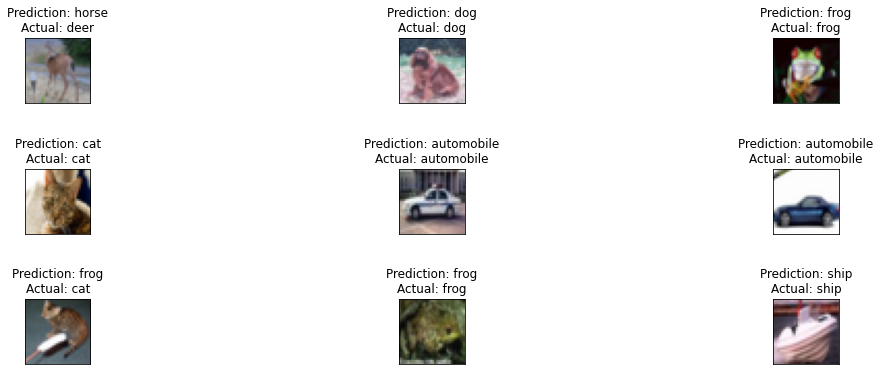

In [16]:
fig, axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i]==key:
            title='Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()